Forecasting and fitting of timeseries data using Prophet In this project, we used time series forecasting using prophet. In first step, we exported data and necessary libraries. Then we inspected the data and looked for necessary information. Then we dropped the two columns which were unnecessary and also looked for dupliacated values and null values. there were none found. Next, we corrected the date format and changed into date time. we renamed the columns to ds and y,as fb prophet only need these two variables. In the next step we forecasted for the coming 100 days using prophet model. Then we visualised the data by plotlib. In last we checked the fitness of the model by cross validation and in the end the result is interpreted.

### Project

in this project we will make model for prediction of future sales of a bakery, using FB Prophet

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


## importing data

In [23]:
df=pd.read_csv(r"C:\Users\HP\Downloads\perrin-freres-monthly-champagne-.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


## Inspecting the data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


it shows that the data has four columns and also shows which type of the data is in the column

In [25]:
df.shape

(107, 2)

it shows the number of rows and columns in the data frame

In [26]:
df.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


it shows the basic statistics of the data frame

## Cleaning the Data

in this step, we will clean the data such as: dropping duplicates, removing null values, renaming columns and changing the data to proper types

In [27]:
df.duplicated().sum()
#it shows that there are no duplicate values

0

In [28]:
df.isna().sum()
#we looked for null values and it shows that there are 3 null values in the data

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [30]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   105 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [31]:
df.columns

Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object')

Changing the data columns names

In [34]:
df=df.rename(columns={'Month':"ds",'Perrin Freres monthly champagne sales millions ?64-?72':"y"})

#### Changing Column data type

In [35]:
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      105 non-null    datetime64[ns]
 1   y       105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


#### Visualizing the Data

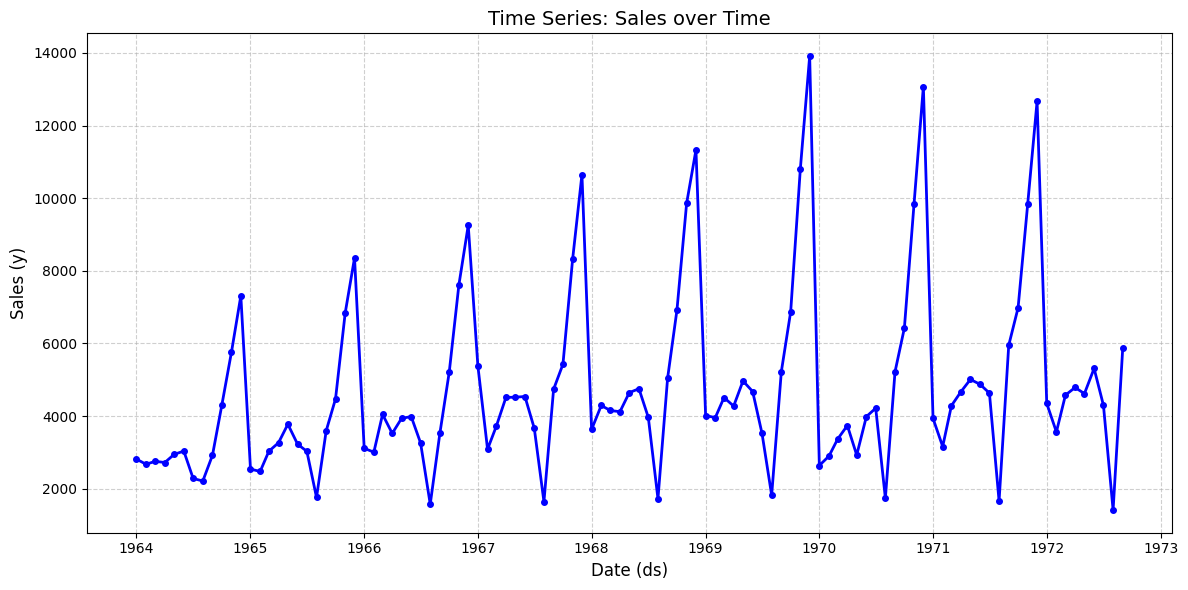

In [39]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], color='blue', linewidth=2, marker='o', markersize=4)
plt.title('Time Series: Sales over Time', fontsize=14)
plt.xlabel('Date (ds)', fontsize=12)
plt.ylabel('Sales (y)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Training and Fitting the model

In [42]:
m= Prophet(interval_width=0.95)
m.add_seasonality(
    name='monthly',      # Custom seasonality name
    period=30.5,         # Average days in a month
    fourier_order=5      # Controls flexibility; higher = more wiggly
)
model= m.fit(df)

11:05:23 - cmdstanpy - INFO - Chain [1] start processing
11:05:23 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

In [45]:
future= m.make_future_dataframe(periods=12, freq="ME")
forecast= m.predict(future)

In [47]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
112,1973-04-30,4891.978110,3037.206855,5879.717935,4891.978057,4891.978159,-497.921339,-497.921339,-497.921339,253.860173,253.860173,253.860173,-751.781513,-751.781513,-751.781513,0.0,0.0,0.0,4394.056771
113,1973-05-31,4901.493685,3392.469225,6245.762585,4901.493619,4901.493748,-78.241215,-78.241215,-78.241215,570.606764,570.606764,570.606764,-648.847980,-648.847980,-648.847980,0.0,0.0,0.0,4823.252470
114,1973-06-30,4910.702305,2736.333379,5509.954791,4910.702228,4910.702381,-773.714949,-773.714949,-773.714949,253.860173,253.860173,253.860173,-1027.575122,-1027.575122,-1027.575122,0.0,0.0,0.0,4136.987356
115,1973-07-31,4920.217880,455.474629,3294.000369,4920.217789,4920.217968,-3062.994711,-3062.994711,-3062.994711,570.606764,570.606764,570.606764,-3633.601476,-3633.601476,-3633.601476,0.0,0.0,0.0,1857.223169
116,1973-08-31,4929.733454,4204.046076,7157.182227,4929.733355,4929.733553,729.559094,729.559094,729.559094,782.806943,782.806943,782.806943,-53.247849,-53.247849,-53.247849,0.0,0.0,0.0,5659.292549


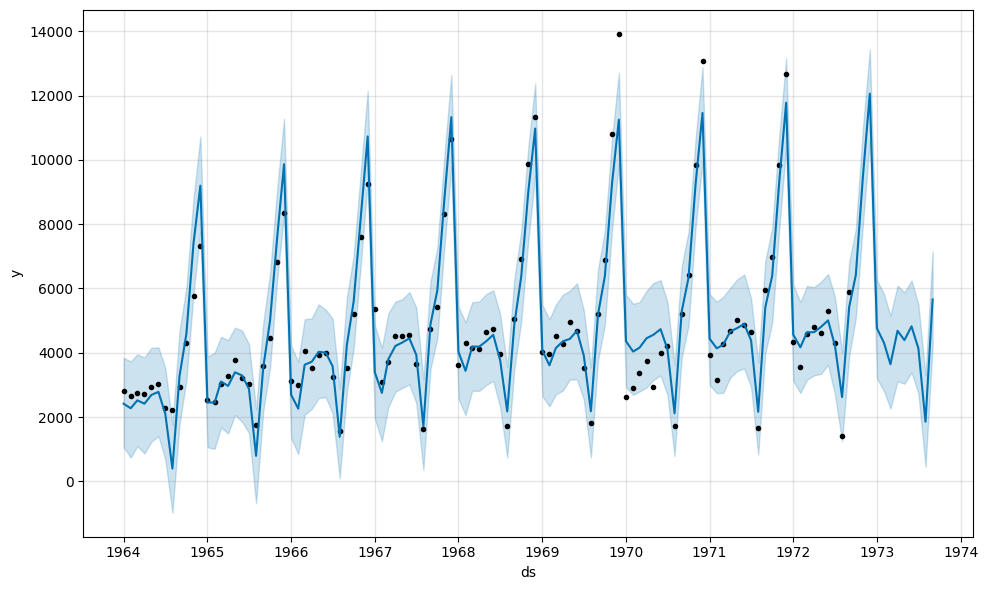

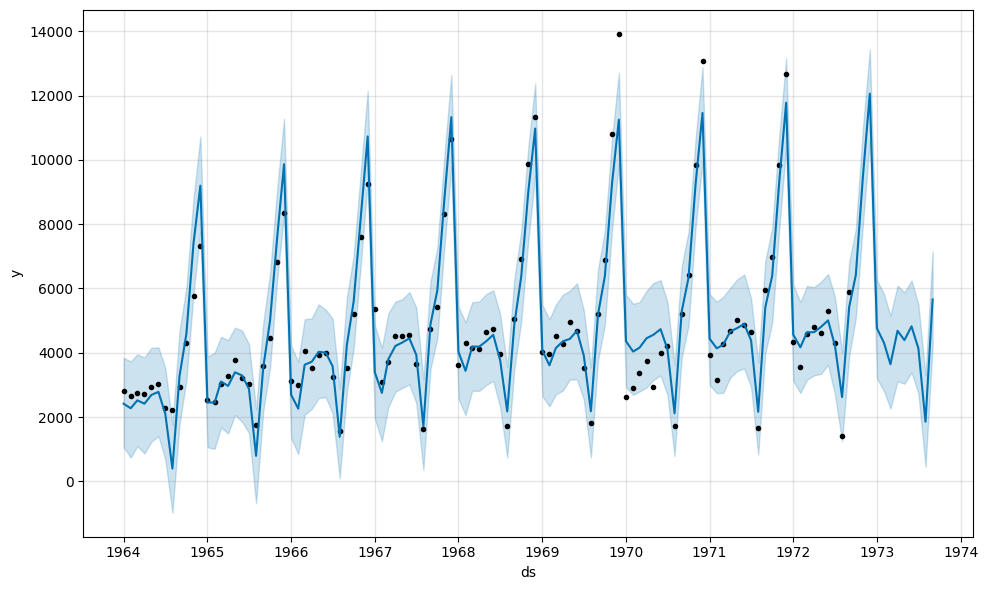

In [49]:
m.plot(forecast)

## Fitness of the Model

In [57]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [58]:

df_cv = cross_validation(m, initial='1095 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())


  0%|          | 0/10 [00:00<?, ?it/s]

11:30:14 - cmdstanpy - INFO - Chain [1] start processing
11:30:14 - cmdstanpy - INFO - Chain [1] done processing
11:30:15 - cmdstanpy - INFO - Chain [1] start processing
11:30:16 - cmdstanpy - INFO - Chain [1] done processing
11:30:16 - cmdstanpy - INFO - Chain [1] start processing
11:30:16 - cmdstanpy - INFO - Chain [1] done processing
11:30:17 - cmdstanpy - INFO - Chain [1] start processing
11:30:18 - cmdstanpy - INFO - Chain [1] done processing
11:30:18 - cmdstanpy - INFO - Chain [1] start processing
11:30:19 - cmdstanpy - INFO - Chain [1] done processing
11:30:19 - cmdstanpy - INFO - Chain [1] start processing
11:30:20 - cmdstanpy - INFO - Chain [1] done processing
11:30:20 - cmdstanpy - INFO - Chain [1] start processing
11:30:21 - cmdstanpy - INFO - Chain [1] done processing
11:30:21 - cmdstanpy - INFO - Chain [1] start processing
11:30:22 - cmdstanpy - INFO - Chain [1] done processing
11:30:22 - cmdstanpy - INFO - Chain [1] start processing
11:30:23 - cmdstanpy - INFO - Chain [1]

  horizon           mse         rmse         mae      mape     mdape  \
0 39 days  5.786953e+05   760.720275  644.292743  0.119190  0.122444   
1 41 days  5.336383e+05   730.505521  621.267237  0.113645  0.122444   
2 45 days  8.954656e+05   946.290466  773.720472  0.127234  0.150861   
3 46 days  8.913667e+05   944.122209  762.412202  0.124099  0.150861   
4 50 days  1.129031e+06  1062.558529  836.461501  0.125935  0.153965   

      smape  coverage  
0  0.126263  0.833333  
1  0.119307  0.833333  
2  0.135116  0.750000  
3  0.131846  0.750000  
4  0.134060  0.750000  


## Interpreting the Results

In [ ]:
	Verdict
Accuracy	✅ Good (≈12% error)
Stability	✅ Forecast performance degrades smoothly
Coverage	✅ Well-calibrated (around 80%)
Reliability	✅ Model is consistent and usable for practical forecasts

In [60]:
df_compare = df.merge(forecast[['ds', 'yhat']], on='ds', how='left')

<Axes: >

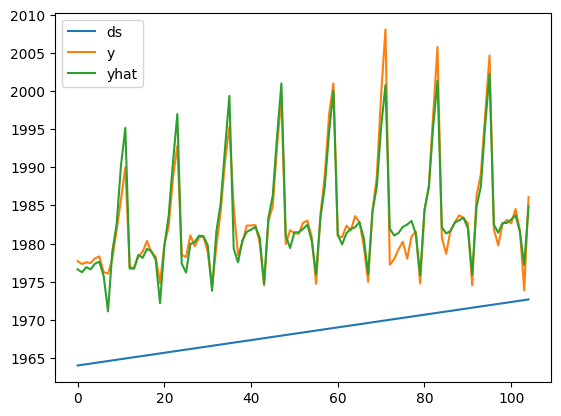

In [62]:
df_compare.plot()